# Udacity Data Scientist Nanodegree - Project 1: Singapore apartment resale prices analysis

## Introduction

In this Jupyter Notebook, a thoroughful analysis of the resale price of apartments in the city of Singapore will be performed. A dataset from the Singaporean Government website was downloaded in .csv file. In this case, a dataset containing resale price information from the time period between January 2017 and October 2020 was selected. You can find a lot of different datasets regarding apartment prices in Singapore in this [link](https://data.gov.sg/dataset/resale-flat-prices?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee).

Thanks to this analysis, answers to the following questions will be provided:

* Which is the district of Singapore with higher average apartment resale price per square meter? 
* Apart from the district, which other features significantly affect the resale price?
* Which is a reasonable resale price for an apartment in Singapore with specific characteristics?

## Step 1 - Preparation & data acquisition

In this first step, the different Python libraries needed for the analysis will be imported. The dataset object of analysis will also be imported. The source of this dataset can be found in the introduction, but please notice that the name of the .csv file was changed to make it shorter and easier to read.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


# Read the dataset
df=pd.read_csv("SG_prices.csv")

## Question 1: Which is the district of Singapore with higher average apartment resale price per square meter?

In this first step, the following features will be analyzed: "town", "floor_area_sqm" and "resale_price". Python groupby feature will be used to classify the apartments depending on the part of the city they are located in. A new feature, "price_per_sqm", will be introduced to calculate the average price per square meter of the different "towns" or districts of Singapore.

Box plots for the the average resale_price, floor_area_sqm and price_per_sqm will be represented to have a better overview of average prices and flat sizes for each district.

In [2]:
# Obtain a column with the price per sqm from "resale_price" and "floor_area_sqm" columns

df_price_sqm = df_analysis = df[["town","floor_area_sqm","resale_price"]].copy()
df_price_sqm["price_per_sqm"] = df_price_sqm["resale_price"]/df_price_sqm["floor_area_sqm"]

# Classify the dataset depending on the part of the city
df_price_sqm_area = df_price_sqm.groupby(["town"])

#Obtain the average price per sqm for each component of the group "town"
df_price_sqm_area_mean = df_price_sqm.groupby(["town"]).mean()

# Print the new dataset with the average relase_price, floor_area_sqm and price_per_sqm for each component of the group "town"
df_price_sqm_area_mean[["resale_price","floor_area_sqm","price_per_sqm"]]
df_price_sqm_area_mean

,floor_area_sqm,resale_price,price_per_sqm
town,,,
ANG MO KIO,85.015143,409091.175230,4697.692106
BEDOK,89.234128,409712.076855,4548.822407
BISHAN,108.059899,641283.327238,5904.359382
BUKIT BATOK,95.668433,381446.821712,3960.697836
BUKIT MERAH,87.181590,563574.068842,6377.400329
BUKIT PANJANG,102.519903,429389.414355,4203.531173
BUKIT TIMAH,110.429204,711873.247788,6403.479595
CENTRAL AREA,81.346999,615835.303075,7379.511753
CHOA CHU KANG,110.541435,389175.747877,3540.246995


Text(0.5, 1.0, 'Average apartment price per sqm in Singapore')

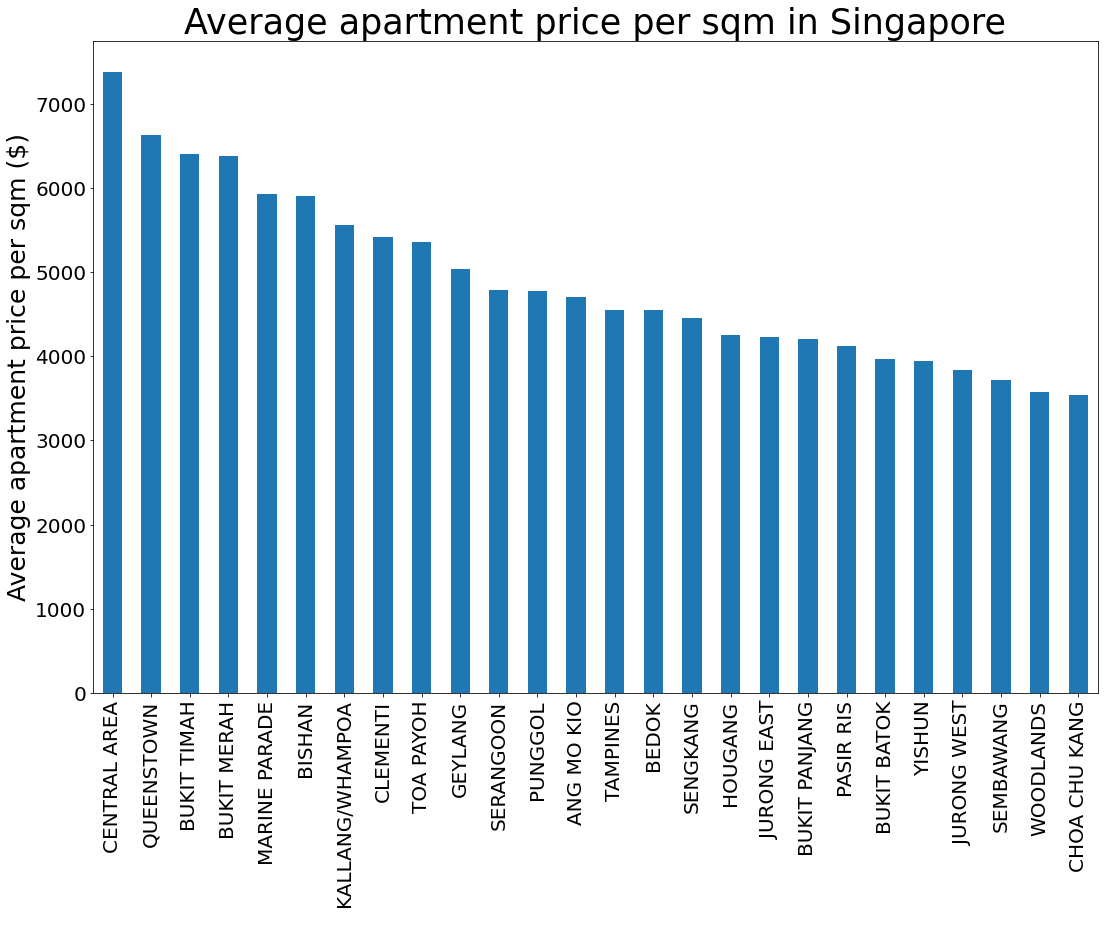

In [3]:
# Bar plot representing average price per sqm for each component of the group "town" in descending order

df_price_sqm_max = df_price_sqm.groupby(["town"])["price_per_sqm"].mean().sort_values(ascending=False)

df_price_sqm_max.plot.bar(width = 0.5, fontsize = 20, figsize=(18,12))

plt.xticks(rotation='vertical')

plt.xlabel(" ")

plt.ylabel('Average apartment price per sqm ($)', fontsize = 25) 

plt.title('Average apartment price per sqm in Singapore', fontsize = 35)

Text(0.5, 1.0, 'Average apartment price in Singapore')

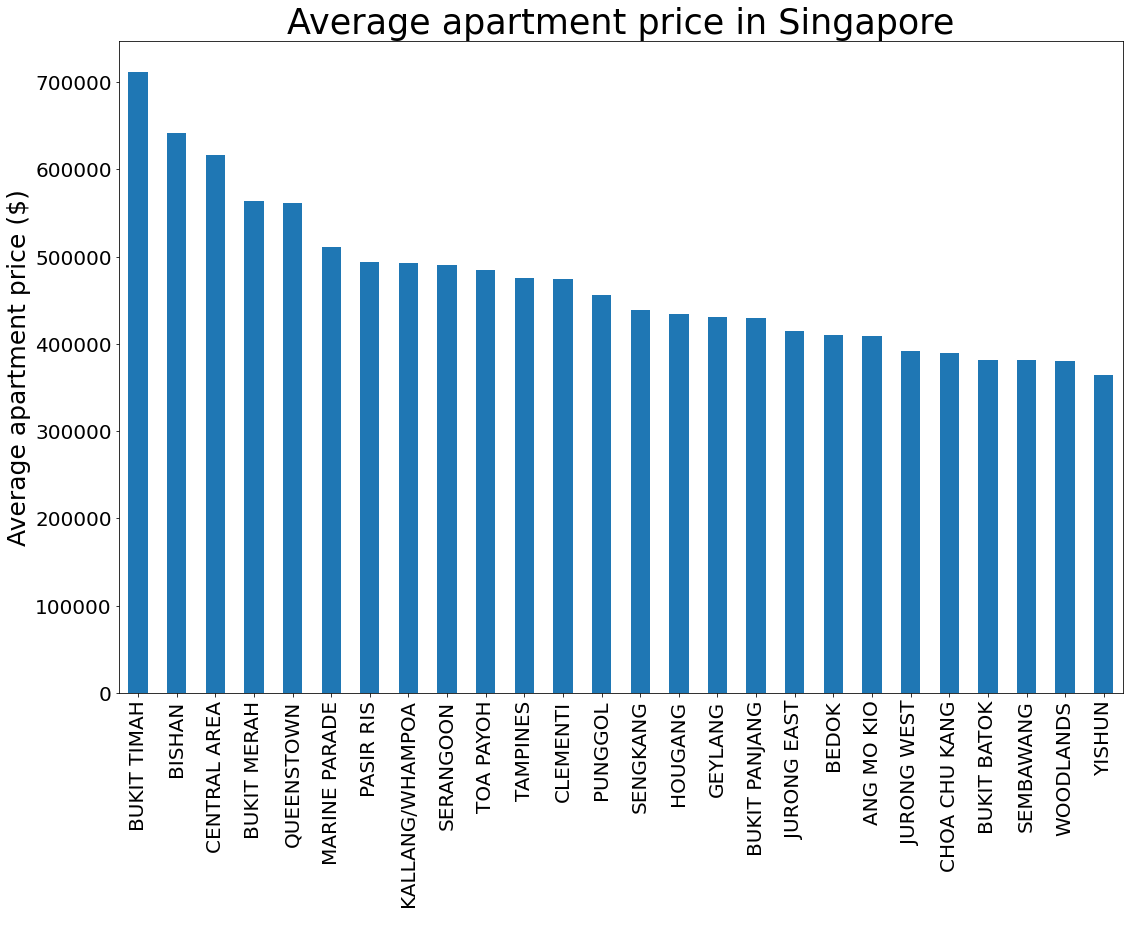

In [4]:
# Bar plot representing average resale price for each component of the group "town" in descending order

df_price_max = df_price_sqm.groupby(["town"])["resale_price"].mean().sort_values(ascending=False)

df_price_max.plot.bar(width = 0.5, fontsize = 20, figsize=(18,12))

plt.xticks(rotation='vertical')

plt.xlabel(" ")

plt.ylabel('Average apartment price ($)', fontsize = 25) 

plt.title('Average apartment price in Singapore', fontsize = 35)

Text(0.5, 1.0, 'Average apartment size in Singapore')

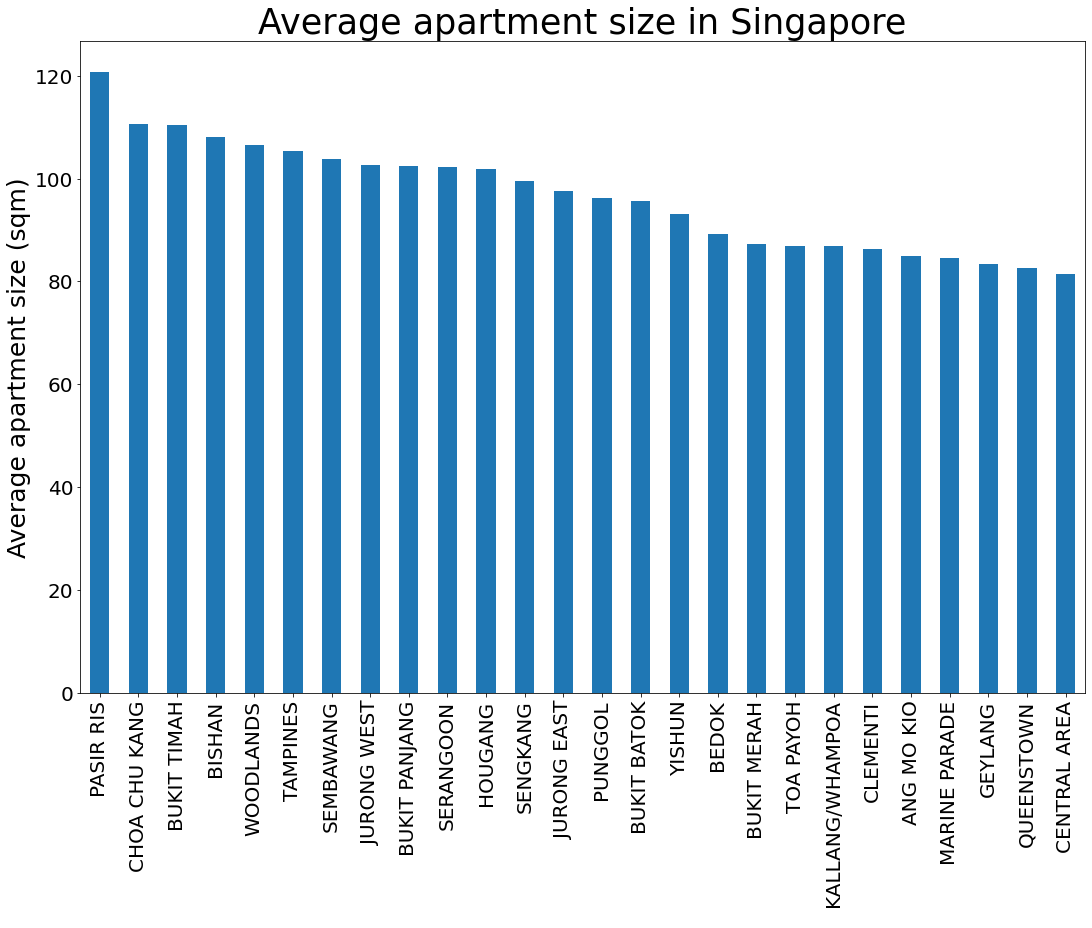

In [5]:
# Bar plot representing average floor area for each component of the group "town" in descending order

df_area_max = df_price_sqm.groupby(["town"])["floor_area_sqm"].mean().sort_values(ascending=False)

df_area_max.plot.bar(width = 0.5, fontsize = 20, figsize=(18,12))

plt.xticks(rotation='vertical')

plt.xlabel(" ")

plt.ylabel('Average apartment size (sqm)', fontsize = 25) 

plt.title('Average apartment size in Singapore', fontsize = 35)

## Answer to question 1:

Singapore Central Area has the highest prices per square meter.

## Question 2: Apart from the district, which other features significantly affect the resale price?

To answer this question, box plots representing the average apartment resale price against different apartment features will be represented. Besides that, the scatter plot of the resale price against the floor area will be represented, and the regression line will also be calculated.

### Scatter plot and linear regression for "Resale price" vs "Floor area sqm":

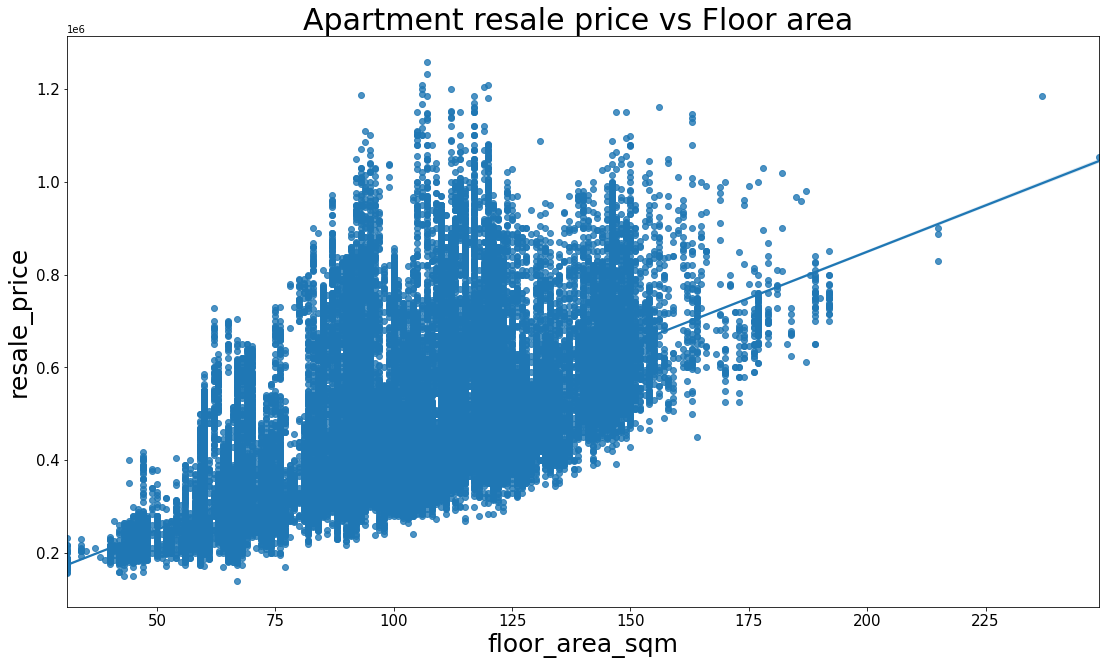

In [6]:
# Regression line for "resale price" vs "floor area sqm"

plt.title("Apartment resale price vs Floor area ", fontsize=30 )
plt.xlabel("Floor area (sqm)", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
pearson_coef, p_value = stats.pearsonr(df["floor_area_sqm"],df["resale_price"])
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
sns.regplot(x="floor_area_sqm", y="resale_price", data=df).figure.set_size_inches(18.5, 10.5)

### Obtain pearson coefficient of the lineal regression

In [7]:
# Obtain the pearson coefficient of the lineal regression
pearson_coef


0.6310142296739736

### Residual plot for "Resale price vs "Floor area sqm":

C:\Users\luisc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

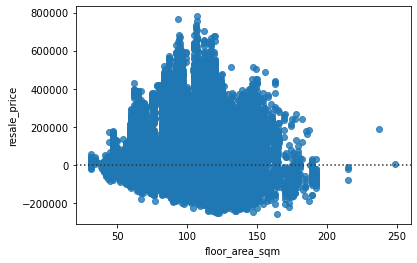

In [8]:
# Obtain the residual plot of resale_price against floor_area_sqm

sns.residplot(df["floor_area_sqm"],df["resale_price"])

### Box plot for "Resale price" vs "Flat type":

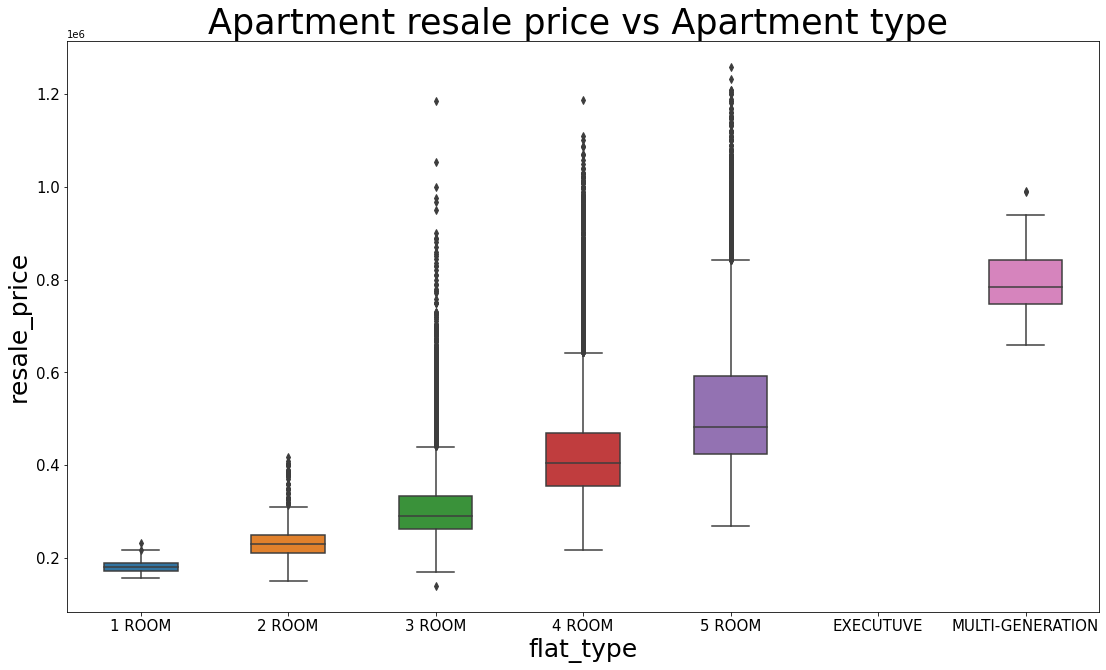

In [9]:
# Box plot for Price vs Flat type

columns_my_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
columns_my_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTUVE', 'MULTI-GENERATION']
plt.title("Apartment resale price vs Apartment type ", fontsize=35 )
plt.xlabel("Apartment type", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

sns.boxplot(x="flat_type", y="resale_price", data=df, width=0.5, order=columns_my_order).figure.set_size_inches(18.5, 10.5)

### Box plot for "Floor area" vs "Flat type":

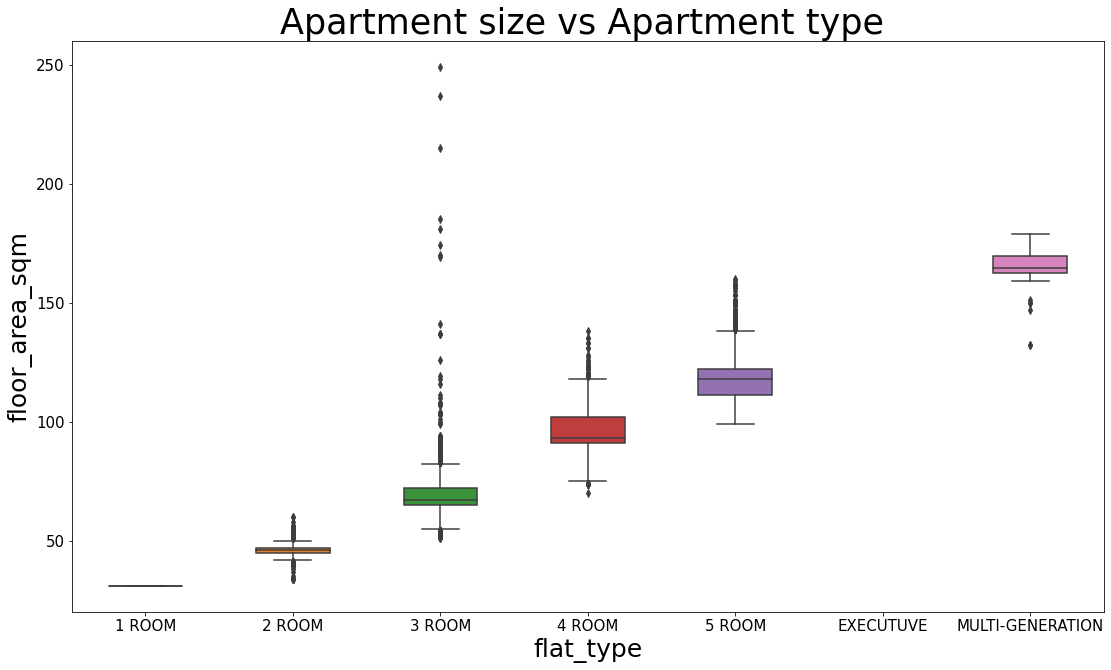

In [10]:
# Box plot for Floor area vs Flat type

columns_my_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
columns_my_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTUVE', 'MULTI-GENERATION']
plt.title("Apartment size vs Apartment type ", fontsize=35 )
plt.xlabel("Apartment type", fontsize=25)
plt.ylabel("Apartment size (sqm)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

sns.boxplot(x="flat_type", y="floor_area_sqm", data=df, width=0.5, order=columns_my_order).figure.set_size_inches(18.5, 10.5)

### Box plot for "Resale price" vs "Month of sale":

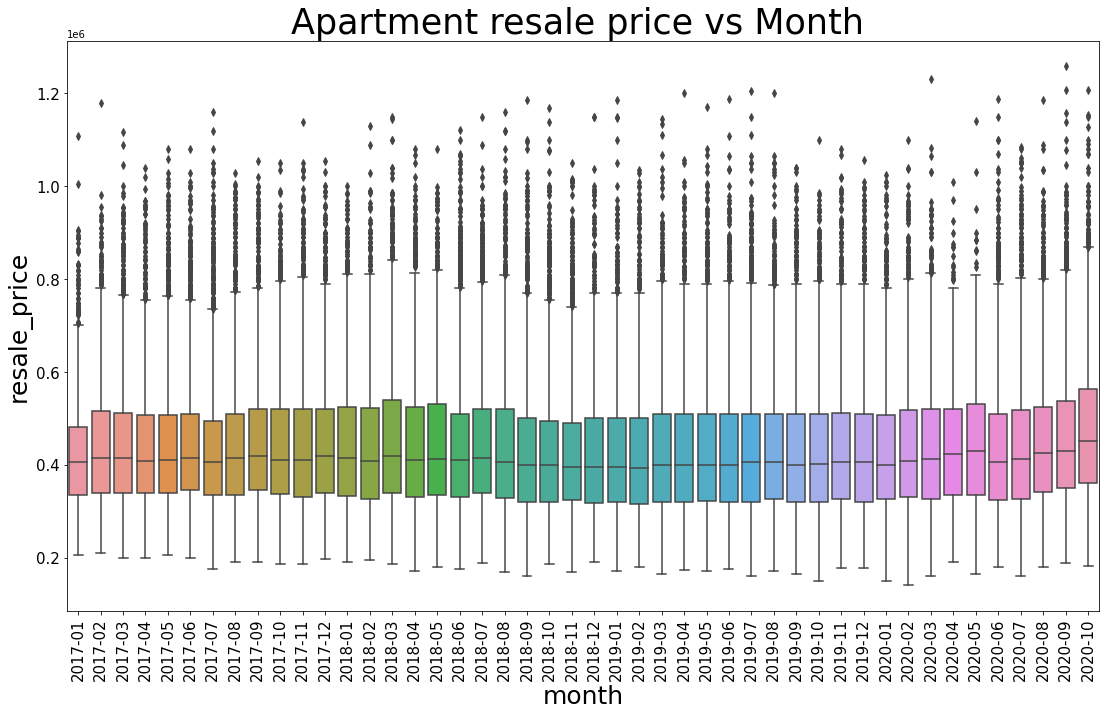

In [11]:
# Box plot for Price vs Month of sale

plt.title("Apartment resale price vs Month ", fontsize=35 )
plt.xlabel("Month", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(rotation='vertical')

sns.boxplot(x="month", y="resale_price", data=df).figure.set_size_inches(18.5, 10.5)

### Box plot for "Resale price" vs "Storey range":

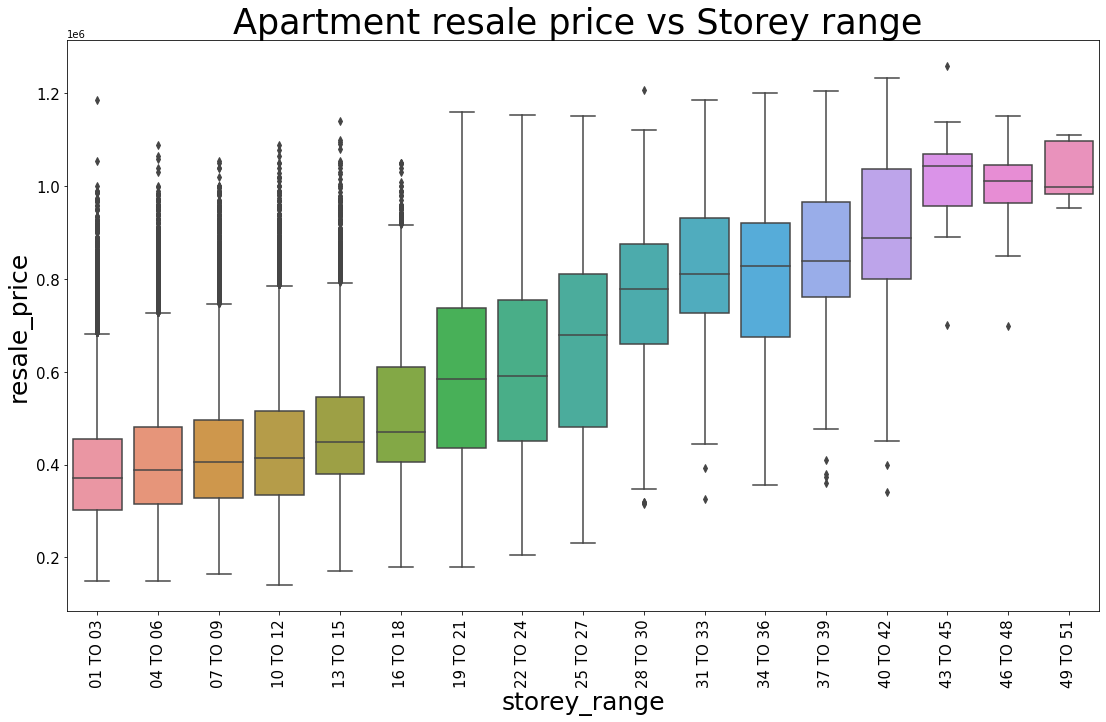

In [12]:
# Box plot for Price vs Storey range

columns_my_order=["01 TO 03", "04 TO 06", "07 TO 09", "10 TO 12", "13 TO 15", "16 TO 18", "19 TO 21", "22 TO 24", "25 TO 27", "28 TO 30", "31 TO 33", "34 TO 36", "37 TO 39", "40 TO 42", "43 TO 45", "46 TO 48", "49 TO 51"]
plt.title("Apartment resale price vs Storey range ", fontsize=35)
plt.xlabel("Storey range", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(rotation='vertical')

sns.boxplot(x="storey_range", y="resale_price", data=df, order=columns_my_order).figure.set_size_inches(18.5, 10.5)

### Box plot for "Resale price" vs "Lease commence date":

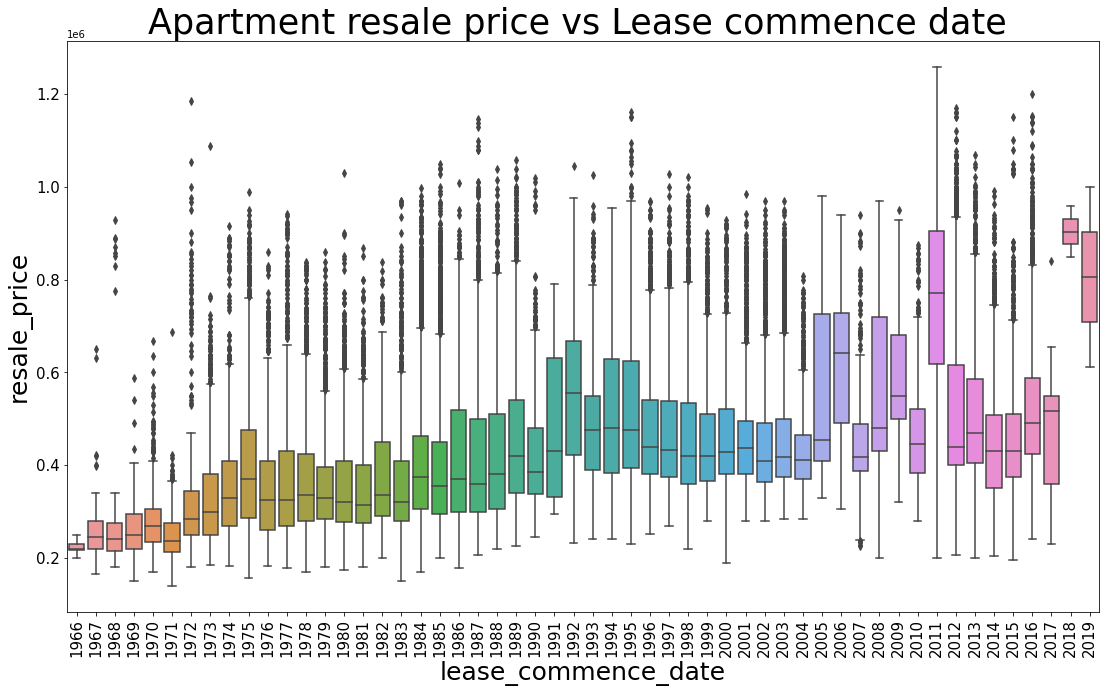

In [13]:
# Box plot for Resale price vs Lease commence date

plt.title("Apartment resale price vs Lease commence date ", fontsize=35)
plt.xlabel("Lease commence date (year)", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(rotation='vertical')

sns.boxplot(x="lease_commence_date", y="resale_price", data=df).figure.set_size_inches(18.5, 10.5)

### Box plot for "Resale price" vs "Flat model":

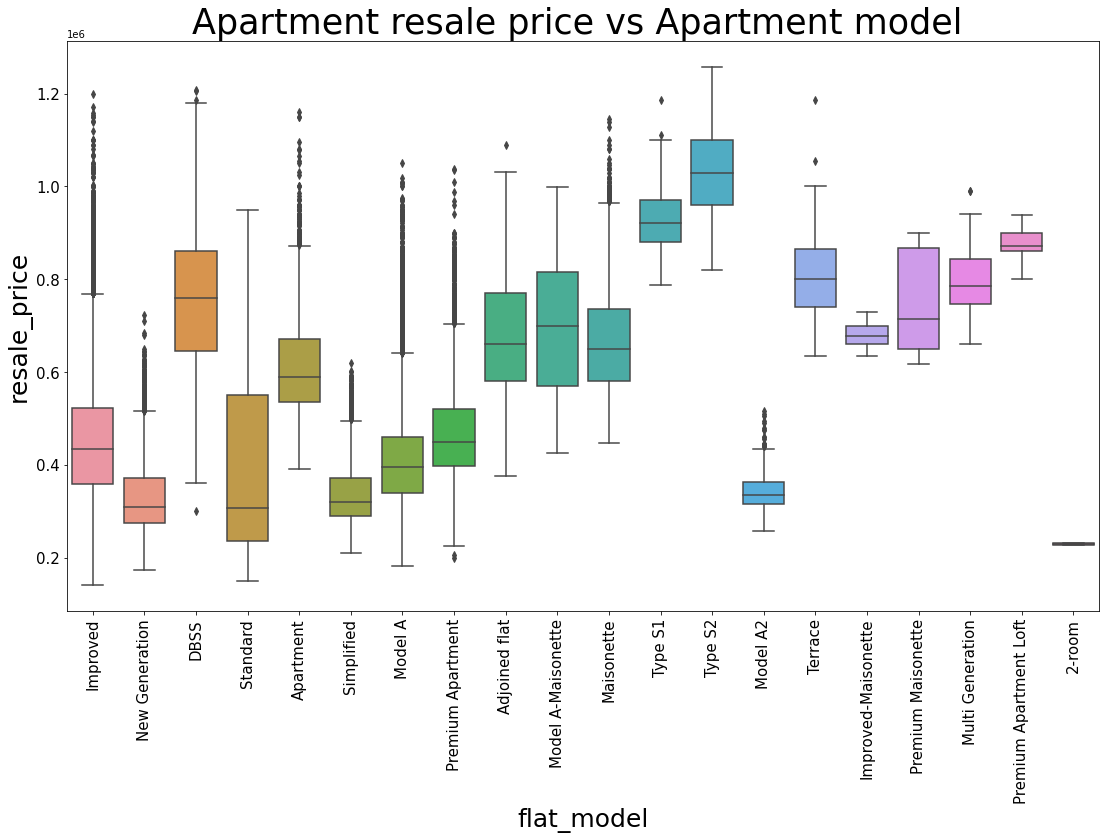

In [14]:
# Box plot for Resale price vs Flat model

plt.title("Apartment resale price vs Apartment model ", fontsize=35)
plt.xlabel("Apartment model", fontsize=25)
plt.ylabel("Apartment price ($)", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xticks(rotation='vertical')

sns.boxplot(x="flat_model", y="resale_price", data=df).figure.set_size_inches(18.5, 10.5)

## Answer to question 2: 

The type of apartment and the storey range are the features with higher influence to the resale price of the apartments in Singapore, apart from the floor area (directly related to the apartment type). The lease commencement date also seems to play an important role on the price, whereas the date at which the apartment was sold, at least in the period from January 2017 to October 2020, does not reflect any significant impact on the prices.

## Question 3: Which is a reasonable resale price for an apartment in Singapore with specific characteristics?

A multiple linear model will be developed in order to try to provide an answer to this question. For such purpose, the first step is to choose a set of apartment features that might provide better results. Based on the results obtained from questions 1 and 2, the model will be built based on the following information: District of the city, type of flat, floor area of the apartment, lease commence date, storey range, and flat model. Our target variable will be "resale price".

In [15]:
# Extract the columns of interest from the original dataset

df_analysis = df[["town","flat_type","floor_area_sqm", "lease_commence_date", "storey_range","resale_price","flat_model"]].copy()

A set of 3 apartments will be picked up from the dataset and the accuracy of the test will be tested by trying to predict the resale price of those three apartments.
In order to ensure total independency of the model on these apartments, they will be removed from the dataset and therefore they won't contribute to fit the model.

In [16]:
# Pick three columns as a sample

df_analysis.iloc[[25000, 30000, 35000], :] 

,town,flat_type,floor_area_sqm,lease_commence_date,storey_range,resale_price,flat_model
25000,BUKIT MERAH,3 ROOM,72.0,1980,04 TO 06,450000.0,New Generation
30000,WOODLANDS,4 ROOM,86.0,2000,10 TO 12,338000.0,Model A2
35000,BISHAN,4 ROOM,114.0,1992,25 TO 27,738000.0,Model A


In [17]:
# Drop the rows selected in the previous step from the dataset to be analyzed

df_analysis.drop([25000,30000,35000], axis=0, inplace = True)

Dummy columns will be created for the categorical variables:

In [18]:
# This function will allow us create dummy columns for the categorical variables 
# and drop the original columns corresponding to them
# Numerical variables will remain in the df without modifications

def create_dummy_df(df):
 
    cat_df = df.select_dtypes(include=['object'])
    cat_cols = cat_df.columns

    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=0)], axis=1)
        except:
            continue
    return df

In [19]:
# Call the function created in the previous step, selecting df_analysis as input

# A generic df with dummy columns for all categorical variables will be created
# Original columns for all categorical variables will be removed

df_analysis_dummy = create_dummy_df(df_analysis)

In [20]:
# Check the columns resulting from the creation of df_analysis_dummy in the previous step

df_analysis_dummy.columns

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION',
       'storey_range_01 TO 03', 'storey_range_04 TO 06',
       'storey_range_07 TO 09', 'storey_range_10 TO 12',
       'storey_range_13 TO 15', 'storey_range_16 TO 18',
       'storey_range_19 TO 21', 'storey_range_22 TO 24',
   

In this block, features of the three selected apartments will be defined and introduced as input:

In [21]:
# Corresponding to the row 25000 of the original dataset
input_1=[["BUKIT MERAH"], ["3 ROOM"], [72], [1980], ["04 TO 06"], ["New Generation"]]

# Corresponding to the row 30000 of the original dataset
input_2=[["WOODLANDS"], ["4 ROOM"], [86], [2000], ["10 TO 12"], ["Model A2"]]

# Corresponding to the row 35000 of the original dataset
input_3=[["BISHAN"], ["4 ROOM"], [114], [1992], ["25 TO 27"], ["Model A"]]

Dummy variables shall also be created for the input, in a way so that its size and columns matches those of the multiple lineal regression model:

In [22]:
# A function will be created to transform the input so that it has the same columns as df_analysis_dummy, so that it can be processed by
# the model and therefore a predicted resale price can be obtained

keys_df_analysis = ["town", "flat_type", "floor_area_sqm", "lease_commence_date", "storey_range", "flat_model"]

def transform_input(input):

    df_input = pd.DataFrame.from_dict(dict(zip(keys_df_analysis,input)))

    df_input = pd.concat([df_input.drop("town", axis=1), pd.get_dummies(df_input["town"], prefix="town", prefix_sep='_', drop_first=False, dummy_na=0)], axis = 1)

    df_input = pd.concat([df_input.drop("flat_type", axis=1), pd.get_dummies(df_input["flat_type"], prefix="flat_type", prefix_sep='_', drop_first=False, dummy_na=0)], axis = 1)

    df_input = pd.concat([df_input.drop("storey_range", axis=1), pd.get_dummies(df_input["storey_range"], prefix="storey_range", prefix_sep='_', drop_first=False, dummy_na=0)], axis = 1)

    df_input = pd.concat([df_input.drop("flat_model", axis=1), pd.get_dummies(df_input["flat_model"], prefix="flat_model", prefix_sep='_', drop_first=False, dummy_na=0)], axis = 1)
                    
    missing_cols = set(df_analysis_dummy.columns) - set(df_input.columns)

    for c in missing_cols:
        df_input[c] = 0
    # Ensure the order of column in the test set is in the same order than in train set
    df_input = df_input[df_analysis_dummy.columns]

    df_input_final = df_input.drop("resale_price", axis=1)
    
    return df_input_final

Dataset is divided into train and test, the model is trained and r2_scores are obtained, which will provide a measurement of the model accuracy:

In [23]:
# Split the dataset into an X matrix and a response vector y
X = df_analysis_dummy.drop("resale_price", axis=1)
y = df_analysis_dummy["resale_price"]
    
# Create training and test sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state=200) 
    
# Instantiate the LinearRegression model with normalized data
lm_model = LinearRegression(normalize=True) # Instantiate
    
# Fit the model to the training data
lm_model.fit(X_train, y_train) #Fit
    
# Predict the response for the training data and the test data
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
    
# Obtain an rsquared value for both the training and test data
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)


In [24]:
# Obtain the r-square value for the train set
test_score

0.8646909057757166

In [25]:
# Obtain the r-square value for the test set
train_score

0.8650883778340412

A prediction of the resale price for the apartment that was extracted from the dataset will be calculated:


In [26]:
# Predict the price of apartment 1 (input_1), whose real resale price is 450000

df_input_final_1 = transform_input(input_1)

Price_predicted_1 = lm_model.predict(df_input_final_1)

print(Price_predicted_1)

[425856.]


In [27]:
# Predict the price of apartment 2 (input_2), whose real resale price is 338000

df_input_final_2 = transform_input(input_2)

Price_predicted_2 = lm_model.predict(df_input_final_2)

print(Price_predicted_2)

[322048.]


In [28]:
# Predict the price of apartment 3 (input_3), whose real resale price is 738000

df_input_final_3 = transform_input(input_3)

Price_predicted_3 = lm_model.predict(df_input_final_3)

print(Price_predicted_3)

[728832.]


## Answer to question 3:

The multiple linear regression model built for this analysis provides r2 values of approximately 0.865 for both train and test sets, showing a high robustness. Furthermore, prices predicted for the sample of three apartments showed an error lower than 5% with respect to the real resale price in all cases, corroborating the robustness of the model.

Therefore, it is concluded that a reasonable resale prices for an apartment in Singapore can be predicted/calculated by using a multiple linear regression model if enough information is provided.

## Conclusion

From the dataset analysed it was possible to identify which features have a higher impact on the resale price of apartments and which ones barely affect it. Based on those with a higher influence on the price, it was possible to build a multiple lineal regression model that provides good r-square values and also a very accurate estimation of the resale price of a sample of 3 apartments, with an error lower than 5% in all cases.